# Table of Content: <a class="anchor" id="table-of-content"></a>
* [1. Problem Background and Motivation](#problem-background)
* [2. Libraries and Custom Functions](#import-packages)
* [3. Data Exploration/Prep](#data-prep)
* [4. Machine Learning Model](#ml-model)
* [5. Deployment of Model](#model-deployment)

# 1. Problem Background and Motivation <a class="anchor" id="problem-background"></a>

<img src='https://img.jakpost.net/c/2018/08/07/2018_08_07_50869_1533633650._large.jpg' width="700" />

>**What is the problem we are trying to solve?**<br>
>Flight delays pose a common problem in the airline industry incurring huge costs to the airlines and inconvenience to its passengers. 
>Major reasons for flight delays include bad weather conditions, airport congestion, airspace congestion, technical failure, operational challenges and few others.
>Apart from the discomfort to end consumers, the airline is impacted most in terms of cost and market reputation. 
>The costs include extra crew cost, passenger accomodation, airport charges.
>Moreover, aircrafts are a preferred mode of travel as it saves time. With flight delys, this purpose gets refuted leading to agitated customers.
> So, to improve customer experience and reduce the costs incurred by airlines, the airline industry wants to predict any possible flight delays and come up with solution to reduce as many delays as possible.
>We are building a model with past data set to predict the likelihood of flights getting delayd in the future.<br>

>**Brief mention of key stakeholders - who would be interested in this analysis?**<br>
>1. Airlines - As mentioned above, airlines incur huge costs in case of flight delays with an impact on market reputation. They will be benefited with this model by working on reducing delays. 
>2. Customers - If a flight is delayed, it causes extreme discomfort to the passengers in terms of their time, waiting at the airport, unable to reach somewhere at a decided time. If the airlines can work better to improve delays, passengers will be content and can make better use of their time.<br>

* [Go to Top](#table-of-content)

>**Business Objective:** Our intent is to predict flight delays with utmost accuracy. Only then will the airlines be capable of making constructive changes to improve time management of the flights keep all delaying factors in check.

>We are looking at below factors to observe the impact on flight delays:<br>
        - Carrier/Airline<br>
        - Origin<br>
        - Destination<br>
        - Distance<br>
        - Departure Time<br>
        - Weather condition<br>
        - Day of the Week<br>

# 2. Libraries & Custom Functions <a class="anchor" id="import-packages"></a>
* [Go to Top](#table-of-content)

In [91]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
import numpy as np

# Graphics
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn import metrics


# Custom function below is used to display performance measures
# Required inputs are the model name and the two test data objects (X,y)
def class_perf_measures(model,X_test,y_test):
    # Create empty lists to store metric values created within loop
    TP = []
    TN = []
    FP = []
    FN = []
    recall = []
    precision = []
    F1 = []
    Accuracy = []
    
    # Create list of probability threshold values to loop over
    threshold = np.arange(0,1.1,0.1).tolist()

    # Start loop
    for i in threshold:

        # Create class assignments given threshold value
        y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)

        # Append lists with metric values
        TP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,1])
        TN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,0])
        FP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,1])
        FN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,0])
        recall.append(metrics.recall_score(y_test, y_test_pred_class).round(3))
        precision.append(metrics.precision_score(y_test, y_test_pred_class).round(3))
        F1.append(metrics.f1_score(y_test, y_test_pred_class).round(2))
        Accuracy.append(metrics.accuracy_score(y_test, y_test_pred_class).round(2))

    # Create dataframe
    result = pd.DataFrame({"threshold":threshold,
                           "TP":TP,
                           "TN":TN,
                           "FP":FP,
                           "FN":FN,
                           "Precision":precision,
                           "Recall":recall,
                           "F1":F1,
                           "Accuracy": Accuracy
                          })

    # Let's look at our dataframe
    return result

import pickle

# 3. Data Exploration/Prep <a class="anchor" id="data-prep"></a>
* [Go to Top of Notebook](#table-of-content)

- [ ] [Initial Evaluation](#initial-evaluation)
- [ ] [Initial Cleanup - dupes, missing values](#missing-values)
- [ ] [Outlier Detection & Treatment](#outliers)
- [ ] [Feature Selection](#feature-selection)
- [ ] [Data Partitioning](#data-split)
- [ ] [Data Normalization](#normalization)

> **Initial Evaluation** <a class="anchor" id="initial-evaluation"></a>

In [92]:
# Read in data 
df = pd.read_csv('FlightDelays_Clean.csv')

df.tail()

,status_delayed,sch_dep_time,carrier_delta,carrier_us,carrier_envoy,carrier_continental,carrier_discovery,carrier_other,dest_jfk,dest_ewr,dest_lga,distance,origin_dca,origin_iad,origin_bwi,bad_weather,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
2196,0,21.33,0,0,0,0,1,0,0,0,1,229,0,1,0,0,0,0,0,1,0,0,0
2197,0,21.33,0,0,0,0,1,0,0,0,1,229,0,1,0,0,0,0,0,0,1,0,0
2198,0,21.33,0,0,0,0,1,0,0,0,1,229,0,1,0,0,0,0,0,0,0,1,0
2199,0,21.33,0,0,0,0,1,0,0,0,1,229,0,1,0,0,0,0,0,0,0,0,1
2200,0,21.33,0,0,0,0,1,0,0,0,1,229,0,1,0,0,1,0,0,0,0,0,0


> **Initial Evaluation: Notes on Findings**<br><br>
>**Observations:**<br>

>>2201 records<br>
>>**Target:** approved (1 if customer is eligible for loan, 0 otherwise<br><br>

>[Go to Data Prep Outline](#data-prep)
---

> **Initial Cleanup - dupes, missing values** <a class="anchor" id="missing-values"></a>

>**Note:**<br>
The dataset is already clean, and not the scope of this assignment.

> **Initial Cleanup: Summary of Actions**<br><br>
No missing values or dupes

>[Go to Data Prep Outline](#data-prep)
---

> **Outlier Detection & Treatment** <a class="anchor" id="outliers"></a>

> **Note:**<br>
Skipping this part as mentioned above.

> **Outlier Detection: Notes/Summary of Actions**<br>
<br>
>**Note:**<br>
Skipping

>[Go to Data Prep Outline](#data-prep)
---

>**Feature Selection** <a class="anchor" id="feature-selection"></a>
<br>

>**To Do:**<br>
> 1. Include everything<br>


>[Go to Data Prep Outline](#data-prep)
---

> **Data Partitioning** <a class="anchor" id="data-split"></a>
<br>
>To Do:<br>
>1. Put all potential predictor variables into new object called 'X'
>2. Put target variable in new object called 'y'
>3. Partition data into training set and testing set<br>

>We will using Train-Test split of 60%-40% to conduct our analysis as we have ample data to train the model.


In [93]:
target = ['status_delayed']

X = df.drop(target,axis=1)
y = df[target]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.4,random_state=12)

>[Go to Data Prep Outline](#data-prep)
---

> **Data Normalization** <a class="anchor" id="normalization"></a>
<br><br>
>**Note:**<br>
>We do this AFTER splitting the data because we only want to use summary stats<br>
>from the TRAINING data to normalize BOTH TRAIN and TEST data<br>
<br><br>
>OPTIONAL - though it is a good idea to get in the habit of doing this when working with the kNN classifier

In [94]:
# Normalize predictor variables using Z-Scores.
# Use means and standard deviations of features as calculated in the TRAINING DATA
# New values are centered at 0.  Values reflect the number of standard deviations
# each record is above or below the mean.

features_means = X_train.mean()
features_std = X_train.std()

X_train = (X_train - features_means)/features_std
X_test = (X_test - features_means)/features_std

>[Go to Data Prep Outline](#data-prep)
---

# 4. Machine Learning <a class="anchor" id="ml-model"></a>

- [X] [kNN](#first-model)
- [X] [Logistic Model](#second-model)
- [ ] [Performance Evaluation](#third-model)


* [Go to Top](#table-of-content)

> **kNN** <a class="anchor" id="first-model"></a>

>**Definition: For every new record, the target variable is assigned on the basis of majority class for 'k' records in the nearest vicinity to the new record.**<br>
<br>
>Instructions:<br>
>1. Fit numerous kNN models using different values for k. <br>
>2. Choose the "best" value for "k" based on Accuracy

>We usually take odd values for 'k' to avoid scenarios in case of a draw between the two classes.<br>

In [95]:
# 1. train a classifier for different values of k
results = []
for k in [1,3,5,7,9,11,13,15,17,19,21]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train.values.ravel())
    
    # Get predicted class
    y_pred_class = knn.predict(X_test)
    
    # Put Accuracy Score in results object
    results.append({'k':k,
                    'accuracy':metrics.accuracy_score(y_test,y_pred_class)
                   }
                  )
# Put results from above into a Pandas Dataframe
results_df = pd.DataFrame(results)
results_df

,k,accuracy
0,1,0.73
1,3,0.78
2,5,0.78
3,7,0.77
4,9,0.81
5,11,0.81
6,13,0.81
7,15,0.81
8,17,0.82
9,19,0.82


>**Decision:**<br>
>As explained earlier, 'k' is mostly chosen as an odd values to avoid draw between two classes of observation. From the above results, we choose k as 19 as this value has high accuracy value. <br>

>**Re-run kNN using the value selected above:**<br>


In [96]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = knn.predict(X_train)
y_test_pred_class = knn.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))


Training data Accuracy: 0.82
Testing data Accuracy: 0.82


>From the above accuracy result, we have a good accuracy score for both train and test data.

>For this final run of kNN, we will produce a table of performance measures across a range of probability threshold values.<br>

In [97]:
class_perf_measures(knn,X_test,y_test) 

,threshold,TP,TN,FP,FN,Precision,Recall,F1,Accuracy
0,0.00,167,0,714,0,0.19,1.00,0.32,0.19
1,0.10,140,259,455,27,0.23,0.84,0.37,0.45
2,0.20,102,459,255,65,0.29,0.61,0.39,0.64
3,0.30,71,594,120,96,0.37,0.42,0.40,0.75
4,0.40,31,676,38,136,0.45,0.19,0.26,0.80
5,0.50,17,707,7,150,0.71,0.10,0.18,0.82
6,0.60,13,714,0,154,1.00,0.08,0.14,0.83
7,0.70,13,714,0,154,1.00,0.08,0.14,0.83
8,0.80,13,714,0,154,1.00,0.08,0.14,0.83
9,0.90,11,714,0,156,1.00,0.07,0.12,0.82


>**Logistic Model:**<br>
>Let's produce the same table above but this time using a Logistic Model




In [98]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = lr_model.predict(X_train)
y_test_pred_class = lr_model.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))

Training data Accuracy: 0.82
Testing data Accuracy: 0.82


>From the above result, Logistic model is good as accuracy matches the train and test data.<br>
>Both kNN and Logistic model performs well.

>For the final run of Logistic model, we will produce a table of performance measures across a range of probability threshold values.<br>

In [99]:

class_perf_measures(lr_model,X_test,y_test) 

/Users/nikitamodi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,threshold,TP,TN,FP,FN,Precision,Recall,F1,Accuracy
0,0.00,167,0,714,0,0.19,1.00,0.32,0.19
1,0.10,143,232,482,24,0.23,0.86,0.36,0.43
2,0.20,97,497,217,70,0.31,0.58,0.40,0.67
3,0.30,59,633,81,108,0.42,0.35,0.38,0.79
4,0.40,24,687,27,143,0.47,0.14,0.22,0.81
5,0.50,15,710,4,152,0.79,0.09,0.16,0.82
6,0.60,13,714,0,154,1.00,0.08,0.14,0.83
7,0.70,13,714,0,154,1.00,0.08,0.14,0.83
8,0.80,13,714,0,154,1.00,0.08,0.14,0.83
9,0.90,13,714,0,154,1.00,0.08,0.14,0.83


>**Winning Model:**<br>
We need to quickly decide which modeling framework to go forward with<br>
To keep this simple - I'm going to use AUC and will choose the model that gives us the highest value

/Users/nikitamodi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


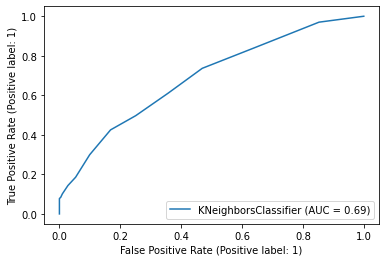

/Users/nikitamodi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


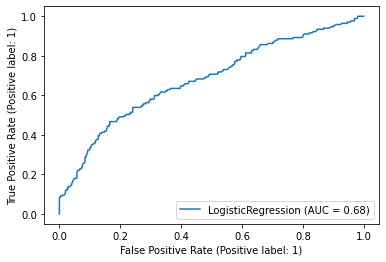

In [100]:
# ROC curve for kNN
metrics.plot_roc_curve(knn,X_test,y_test)
plt.show()

# ROC curve for Logistic Model
metrics.plot_roc_curve(lr_model,X_test,y_test)
plt.show()

In [101]:
y_score = knn.predict_proba(X_test)
k = metrics.roc_auc_score(y_test,y_score[:,1])
print("Area under the Curve for kNN model is",k)

y_score1 = lr_model.predict_proba(X_test)
lr = metrics.roc_auc_score(y_test,y_score1[:,1])
print("Area under the Curve for Logistic Regression model is",lr)

Area under the Curve for kNN model is 0.6880734329660008
Area under the Curve for Logistic Regression model is 0.6795778191516129


>**Decision Point:**<br>
Although the AUC for both the models is low, AUC is highest for our kNN Model so I will use that model to further evaluate probability thresholds and corresponding performance measures

In [102]:

class_perf_measures(knn,X_test,y_test) 

,threshold,TP,TN,FP,FN,Precision,Recall,F1,Accuracy
0,0.00,167,0,714,0,0.19,1.00,0.32,0.19
1,0.10,140,259,455,27,0.23,0.84,0.37,0.45
2,0.20,102,459,255,65,0.29,0.61,0.39,0.64
3,0.30,71,594,120,96,0.37,0.42,0.40,0.75
4,0.40,31,676,38,136,0.45,0.19,0.26,0.80
5,0.50,17,707,7,150,0.71,0.10,0.18,0.82
6,0.60,13,714,0,154,1.00,0.08,0.14,0.83
7,0.70,13,714,0,154,1.00,0.08,0.14,0.83
8,0.80,13,714,0,154,1.00,0.08,0.14,0.83
9,0.90,11,714,0,156,1.00,0.07,0.12,0.82


>**I would like to discuss more about the business objective.**<br><br>
    - The objective is best predict the flight delays. In this case, it is costly for the business to not be able to predict the delays as there will be no corrective measure taken thus incurring high cost to the business.<br><br>
    - So, we will focus on minimising the **False Negatives** - not being able to predict delays when in reality the flight is delayed.<br><br>
    - There is less focus on **False Positives** (predicting a flight delay when the flight is actually not delayed) here because if we predict a flight delay, the impact wouldn't be as high as unpredicted flight delays. There might be some cost incurred to avoid the delay but it wouldn't be as significant as cost for delay.<br>

**Assessing the Probability Threshold grid for kNN Model below:**<br><br>


1. **Prob Threshold = 0.1**:
    - Probability threshold of 0.1 implies that a predicted probability must >= 10% for that record to be assigned to the positive class.
    - relative low threshold required to predict positive outcomes. We have 455 False Positives and 27 False Negatives.
    - With the probability threshold of 0.1, businesses will be extremely keen on avoiding flight delays. There are only 27 delays which are not predicted by the model which will result in losses. Here, recall is at 84%.
    - However, it is extremely stressful for business to operate knowing there can be 455 delays when in fact the flights are not delayed. It will result in loss of time and effort in attempt to fix this.
    - The accuracy here is very low (at 45%) showing less correct predictions. 
    - Along with the stress, airlines might incur added cost to work on avoiding 455 delays.
    - Despite this, airlines incur billions of dollars due to flight delays. We might want to reduce the False Positives here but not at the cost of increasing our False Negatives.
    - We see that the no of flights delayed at this threshold is high - 140.
<br><br>
2. **Prob Threshold = 0.5**:
    - With a probability threshold of 0.5, the accuracy has improved to 82% showing correct predictions.
    - The precision has also improved to 71% indicating lesser False Positives. Here, there are only 7 cases where the flight is not delayed and the model has predicted it to be delayed. The team will have to work lesser to ensure the timely departure of flights.
    - However, there are 150 cases where the flight is delayed and our model has failed to predict it. Due to the prediction error,airlines will incur heavy losses.
    - It is evident that the False Negatives are costly in this scenario.
    - We cannot accept this threshold as our cost is significantly high.
    <br><br>
3. **Prob Threshold = 0.9**:
    - This probability threshold is very similar to threshold of 0.5. The accuracy hasn't changed.
    - However, precision has become 100% indicating 0 FP. i.e., no delays are predicted when the flights are actually not delayed. This saves teams time and effort as well as additonal cost to the company.
    - But improved precison doesn't help as there are 156 unpredicted delays which will impavt the business tremendously by incurring huge cost.
    - This probability threshold doesn't help as the airline is losing a lot of money. 
    
<br><br>
4. Ideally, we should choose the probability threshold of 0% or 10% to avoid the cost incurred due to delays.<br>
But it will result in additional work on 714 or 455 flights to ensure they are on time when in fact they are not expected to be late. This in itself will incur cost to the airline.<br>
We should try to keep the False Negative as low as possible along with False Positive.<br>
I think the cost of each False Negative (unpredicted flight delays in case of actual delay) is higher than False Positive (predicted delays in case of no delay).<br>
So, I will go with the probability threshold of 0.3. The accuracy is higher than the threshold of 0.1 even though recall is still low. But this has 96 unanticipated flight delays and 120 anticipated incorrect flight delays. This is an attempt to keep a balance between the two scenarios.<br>
    

>[Go to Machine Learning Outline](#ml-model)
---

# 5. Deployment of Model <a class="anchor" id="model-deployment"></a>

Optional - Extra Credit for this assignment

* [Go to Top](#table-of-content)